# Breast Cancer Wisconsin (Diagnostic)

Predict whether the cancer is benign or malignant

In [1]:
! pip install mglearn

In [2]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# To evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print(cancer.target_names)

['malignant' 'benign']


In [8]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
cancer.data.shape

(569, 30)

In [10]:
import pandas as pd
raw_data=pd.read_csv('data.csv', delimiter=',')
raw_data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.029820,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.043100,0.07845,0.02624,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.004660,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [0]:
pateient_ID=raw_data['id']

In [12]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
raw_data.shape

(569, 32)

Number of Benign:  357
Number of Malignant :  212


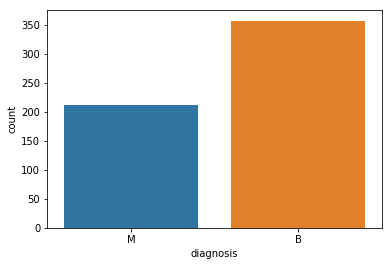

In [14]:
import seaborn as sns
y=raw_data['diagnosis']
ax = sns.countplot(y ,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [15]:
y.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

# Building Model

### i)-KNN Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


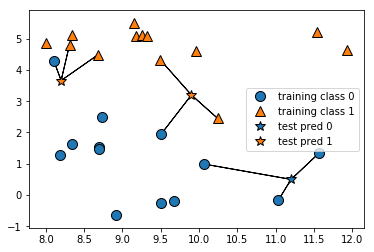

In [16]:
# KNN Classifier Overview
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn=knn.predict(X_test)

In [21]:
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5, on the training set: 0.946
Accuracy of KNN n-5, on the test set: 0.930


In [22]:
# Using p_pred_knn method for confirming
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(accuracy_score(y_test,y_pred_knn)))

Accuracy of KNN n-5, on the training set: 0.930


**Alternative way**

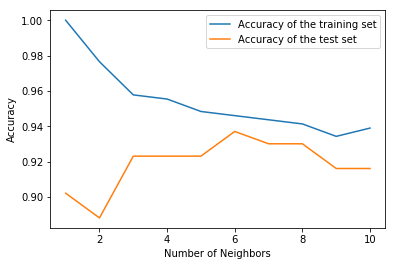

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,11)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

### ii)-Logistic Classifier

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.972
Accuracy on the test subset: 0.937


**Regularization:**

prevention of overfitting - (according to Muller and Guido ML book)
- L1 - assumes only a few features are important
- L2 - does not assume only a few features are important - used by default in scikit-learn LogisticRegression
'C':

parameter to control the strength of regularization<br>
- lower C => log_reg adjusts to the majority of data points.
- higher C => correct classification of each data point.

In [26]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.981
Accuracy on the test subset: 0.944


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.939
Accuracy on the test subset: 0.923


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**By default, we have C=1 as we see in original one.Train accuracy 97 and test accuracy 93.<br>We see a difference in train and test accuracy with C=100 <br>. With C=0.01, we can see train and test accuracy difference very low.**

w[0]: 0.393906  b: -0.031804


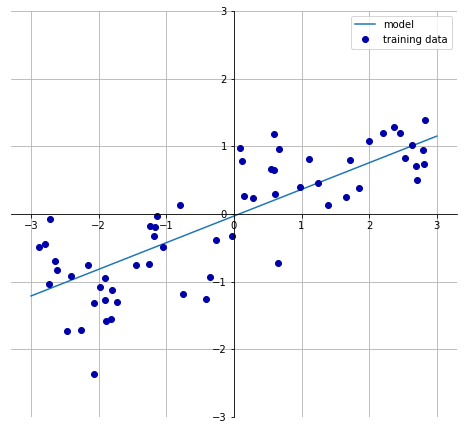

In [28]:
mglearn.plots.plot_linear_regression_wave()

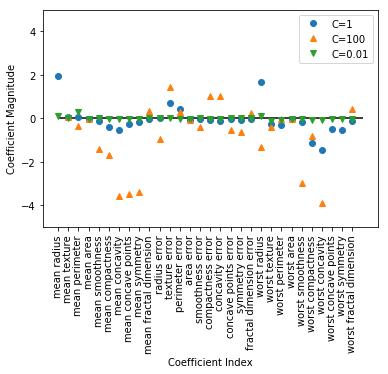

In [29]:
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

**This visual shows how each co-efficient contribute to decision boundry or the prediction for classifying cancer into malignant or benign tumors.**

### iii)-Decision Tree

Feature importances: [0. 1.]


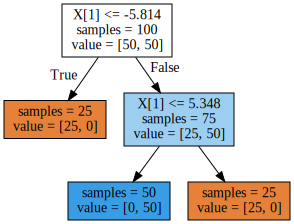

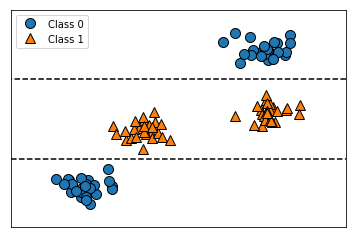

In [30]:
mglearn.plots.plot_tree_not_monotone()

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.895


Training accuracy is 100% which means overfitting

**Optimize model**

In [32]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.902


In [0]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names,
               impurity=False, filled=True)

Check file cancertree.dot <br>
Convert to png and then display by "![ ](cancertree.png ) command"



In [34]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.02220126 0.         0.05411368 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00339317 0.00868491 0.         0.         0.         0.
 0.         0.         0.00330241 0.         0.81689407 0.
 0.02009937 0.01018201 0.01736982 0.04375929 0.         0.        ]


numpy.ndarray

In [35]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


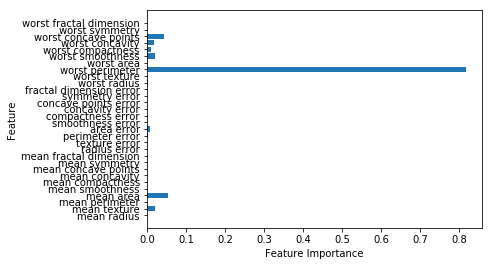

In [36]:
import numpy as np
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Advantages of Decision Trees

- easy to view and understand
- no need to pre-process, normalize, scale, and/or standardize features

Paramaters to work with

- max_depth
- min_samples_leaf, max_samples_leaf
- max_leaf_nodes
etc.

Main Disadvantages

- tendency to overfit
- poor generalization

### iv)-Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.958


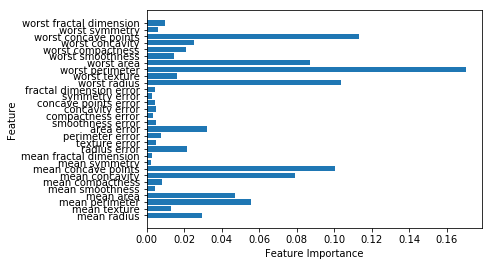

In [38]:
# Feature importance
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Potential Advantages of Random Forests

- powerful and widely implemented
- perform well with default settings
- dont require scaling of the data
- randomization makes them better than single DT

Parameters to Tune

- n_jobs - number of cores to use for training (n_jobs=-1, for all cores)
- n_estimators - how many trees to use (more is always better)
- max_depth, for pre-pruning
- max_features, for randomization
- max_features = sqrt(n_features), for classification
- max_features = log2(n_features), for regression

Potential Disadvantages of Random Forests

- not so good performance on very high dimensional and sparse data (text data)
- large datasets require more resources for training (time, CPUs, etc).
- cannot be visualized as well as single DT

### v)- Neural Network

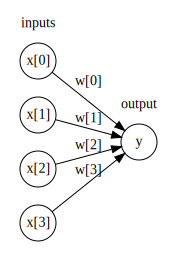

In [39]:
mglearn.plots.plot_logistic_regression_graph()

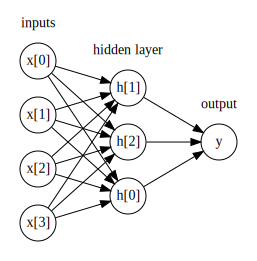

In [40]:
mglearn.plots.plot_single_hidden_layer_graph()

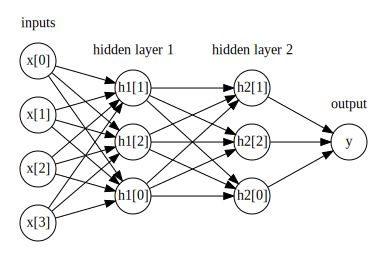

In [41]:
mglearn.plots.plot_two_hidden_layer_graph()

In [42]:
from sklearn.neural_network import MLPClassifier

#cancer = load_breast_cancer()

#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy on the training subset: 0.939
Accuracy on the test subset: 0.916


In [43]:

print('The maximum per each feature:\n{}'.format(cancer.data.max(axis=0)))
# cancer.data is our X.Better be in numpy array

The maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


**Scaling features**

In [0]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

X=cancer.data
y=cancer.target

In [45]:
type(X)

numpy.ndarray

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
# y needs no scaling

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [48]:
mlp = MLPClassifier(max_iter=1000, random_state=42)   

mlp.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy on the training subset: 0.998
Accuracy on the test subset: 0.965


There is better accuracy for both test and train with scaling

In [49]:
print('The maximum per each feature:\n{}'.format(X_scaled.max(axis=0)))

The maximum per each feature:
[ 3.97128765  4.65188898  3.97612984  5.25052883  4.77091122  4.56842498
  4.24358882  3.92792966  4.48475086  4.91091929  8.90690934  6.65527935
  9.46198577 11.04184226  8.02999927  6.14348219 12.0726804   6.64960079
  7.07191706  9.85159257  4.09418939  3.88590505  4.28733746  5.9301724
  3.95537411  5.11287727  4.7006688   2.68587702  6.04604135  6.84685604]


Also feature importance is making more sense

In [50]:
# adding parameters to model
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.979


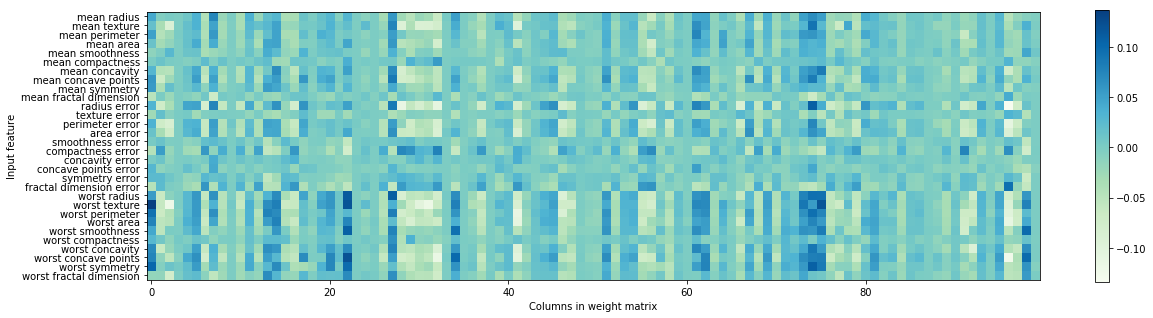

In [51]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='GnBu')
plt.yticks(range(30), cancer.feature_names) # cancer is name of dataframe
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

Stronger points:

- can be used efficiently on large datasets
- can build very complex models
- many parameters for tuning
- flexibility and rapid prototyping
etc.

Weaker points:

- many parameters for tuning
- some solvers are scale sensitive
- data may need to be pre-processed
etc.

Alternatives:

- theano
- tensorflow
- keras
- lasagna
etc.

### vi) SVM

- for classification and regression (SVCs, SVRs)
- can be applied on linear and non-linear data
- look for the best separating line or decision boundary
- look for the largest margin

In [0]:
from sklearn.svm import SVC 

Commonly used kernels:
- linear
- polynomial
- radial basis function (RBF) - Gaussian RBF
- sigmoid

In [53]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.629


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


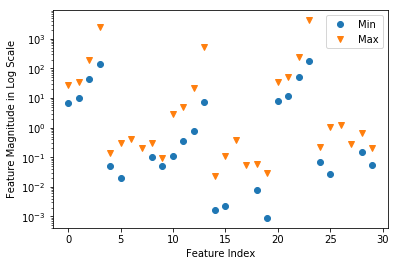

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [55]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [0]:
X_test_scaled = (X_test - min_train)/range_train

In [57]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.948
The accuracy on the test subset: 0.951


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Stronger points:

- they are versatile
- can build complex decision boundaries on low-dimensional data
- can work well on high-dimensional data with relatively small sample size
etc.

Weaker points:

- don't perform well on high-dimensional data with many samples (i.e. > 100k)
- preprocessing may be required => implies knowledge and understanding of hyper-parameters
- harder to inspect and visualize
etc.

Alternatives:

- DT and Random Forests (require less/no preprocessing of data, easier to understand, inspect, and visualize)


Good practices:
- data scaling

other pre-processing

- choosing an appropriate kernel
- tuning hyper-parameters: C, gamma, etc.

In [59]:
print('The decision function is:\n\n{}'.format(svm.decision_function(X_test_scaled)[:20]))

The decision function is:

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]


In [60]:
print('Thresholded decision function:\n\n{}'.format(svm.decision_function(X_test_scaled)[:20]>0))

Thresholded decision function:

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]


In [61]:
svm.classes_

array([0, 1])

### vii)- Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)

gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
print('The accuracy on the training subset: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(gbrt.score(X_test, y_test)))

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.965


# Evaluation

In [64]:
# Predicting Probabilities for SVM 

svm

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
svm = SVC(C=1000, probability=True)
svm.fit(X_train_scaled, y_train)

print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(svm.predict_proba(X_test_scaled[:20])))

Predicted probabilities for the samples (malignant and benign):

[[9.97020965e-01 2.97903457e-03]
 [5.26281327e-02 9.47371867e-01]
 [6.14999342e-03 9.93850007e-01]
 [3.74801166e-02 9.62519883e-01]
 [5.69414214e-06 9.99994306e-01]
 [9.41222132e-03 9.90587779e-01]
 [1.03673901e-06 9.99998963e-01]
 [6.69286982e-03 9.93307130e-01]
 [2.78226530e-03 9.97217735e-01]
 [6.33170995e-09 9.99999994e-01]
 [1.57855041e-01 8.42144959e-01]
 [6.36482814e-02 9.36351719e-01]
 [8.36570348e-08 9.99999916e-01]
 [3.51976151e-01 6.48023849e-01]
 [2.05554527e-01 7.94445473e-01]
 [9.90117310e-01 9.88269027e-03]
 [9.68111633e-03 9.90318884e-01]
 [9.99961432e-01 3.85677249e-05]
 [9.99851855e-01 1.48145300e-04]
 [9.99999900e-01 1.00000010e-07]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [66]:
svm.predict(X_test_scaled)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [67]:
# Same can be done for gradient boosting

print('The decision function for the Grad Boosting:\n\n{}'.format(gbrt.decision_function(X_test[:10])))

The decision function for the Grad Boosting:

[-1.14446016  1.68027315  1.7743656   1.7531149   1.7743656   1.7743656
  1.68027315  1.7743656   1.68027315  1.7743656 ]


In [68]:
print('Predicted probabilities for the samples:\n\n{}'.format(gbrt.predict_proba(X_test[:10])))

Predicted probabilities for the samples:

[[0.75849759 0.24150241]
 [0.1570593  0.8429407 ]
 [0.14500026 0.85499974]
 [0.14765475 0.85234525]
 [0.14500026 0.85499974]
 [0.14500026 0.85499974]
 [0.1570593  0.8429407 ]
 [0.14500026 0.85499974]
 [0.1570593  0.8429407 ]
 [0.14500026 0.85499974]]


In [69]:
gbrt.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### For a 3-class classification

We will use iris dataset as an example

In [70]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)

gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [71]:
print('The decision function for the 3-class iris dataset:\n\n{}'.format(gbrt.decision_function(X_test[:10])))

The decision function for the 3-class iris dataset:

[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.9967734  -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.9957153   0.04758118 -1.92721297]]


In [72]:
print('Predicted probabilities for the samples in the iris dataset:\n\n{}'.format(gbrt.predict_proba(X_test[:10])))

Predicted probabilities for the samples in the iris dataset:

[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]
 [0.10217734 0.78840063 0.10942203]
 [0.09763388 0.11012536 0.79224076]
 [0.10217734 0.78840063 0.10942203]
 [0.10217734 0.78840063 0.10942203]]


#  Feature Selection

Three types



Univariate Statistics

- determines the relationship between each feature and output (target)

only the features with highest confidence are selected
- SelectKBest - selecting K number of features
- SelectPercentile - selection is made based on a percentage of the original features

In [73]:
from sklearn.feature_selection import SelectPercentile
cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))


# Create noise to dataset
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape))
print('X_train_selected.shape is: {}'.format(X_train_selected.shape))

X_train.shape is: (284, 80)
X_train_selected.shape is: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


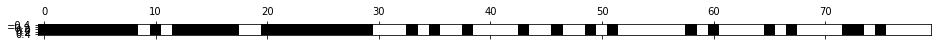

In [74]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [75]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('The score of Logistic Regression on all features: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)
print('The score of Logistic Regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

The score of Logistic Regression on all features: 0.930
The score of Logistic Regression on the selected features: 0.940


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model-Based Feature Selection

- uses a supervised model to determine the importance of each feature
- keeps the most important features
- needs a measure for the importance of features (DT and RF have the 'feature_importances' attribute)

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
# threshold is point where model will select features above this point of threshold

In [77]:
select.fit(X_train, y_train)
X_train_s = select.transform(X_train)
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

The shape of X_train is:  (284, 80)
The shape of X_train_s is  (284, 40)


Text(0.5, 0, 'Index of Features')

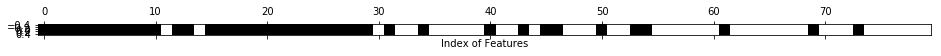

In [78]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

In [80]:
X_test_s = select.transform(X_test)
score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('The score of Logistic Regression with the selected features on the test set: {:.3f}'.format(score))

The score of Logistic Regression with the selected features on the test set: 0.951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
